# Initialization

Run the following code to import the modules you'll need. After your finish the assignment, **remember to run all cells** and save the note book to your local machine as a PDF for gradescope submission.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Download data

In this section we will download the data and setup the paths.


In [ ]:
# Download the data
if not os.path.exists('/content/carseq.npy'):
    !wget https://www.cs.cmu.edu/~deva/data/carseq.npy -O /content/carseq.npy
if not os.path.exists('/content/girlseq.npy'):
    !wget https://www.cs.cmu.edu/~deva/data/girlseq.npy -O /content/girlseq.npy

# Q2.1: Theory Questions (5 points)
Please refer to the handout for the detailed questions.

## Q2.1.1: What is $\frac{\partial \mathbf{W}(\mathbf{x};\mathbf{p})}{\partial \mathbf{p}^{T}}$? (**Hint**: It should be a 2x2 matrix)

===== your answer here! =====

We know that 

$$x' = \mathbf{W}(\mathbf{x};\mathbf{p}) = \mathbf{x} + \mathbf{p} \hspace{9cm} (1)$$

then

$$\frac{\partial \mathbf{W}(\mathbf{x};\mathbf{p})}{\partial \mathbf{p}^{T}} \overset{(1)}{=} \frac{\partial (\mathbf{x} + \mathbf{p})}{\partial \mathbf{p}^{T}} = \frac{\partial [x+p_x, y+p_y]^T}{\partial [p_x, p_y]} = \begin{bmatrix} \frac{\partial (x+p_x)}{\partial p_x} & \frac{\partial (x+p_x)}{\partial p_y} \\ \frac{\partial (y+p_y)}{\partial p_x} & \frac{\partial (y+p_y)}{\partial p_y}\end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \quad \quad (2)$$

===== end of your answer =====

## Q2.1.2: What is $\mathbf{A}$ and $\mathbf{b}$?

===== your answer here! =====

Given this taylor approximation

$$\mathcal{I}(\mathbf{x} + \Delta \mathbf{p }) \approx \mathcal{I}(\mathbf{x}) + \frac{\partial \mathcal{I}(\mathbf{x})}{\partial \mathbf{x}^T} \frac{\partial \mathbf{W}(\mathbf{x}; \mathbf{p})}{\partial \mathbf{p}^T} \Delta \mathbf{p } \hspace{4cm} (3)$$

Given a fixed $\mathbf{x}$ (intial position) and $\mathbf{p}_0$ (possibly all zeros), we can define 

$$\mathbf{x'} = \mathbf{x} + \mathbf{p}        \hspace{9cm} (4)$$ 

then from the original equation we can find $\mathbf{p}^*$ optimizing $\Delta\mathbf{p}$ as $\mathbf{p}^* = \mathbf{p} + \Delta\mathbf{p}^*$:

$$\begin{array}{rcl}
\mathbf{p}^* &=& \arg\min_{\mathbf{p}} \sum_{x \in \mathcal{T}_t} \left\| \mathcal{I}_{t+1}(\mathbf{W}(x; \mathbf{p})) - \mathcal{T}_t(x) \right\|_2^2 \\
&\overset{(1)}{=}& \arg\min_{\mathbf{p}} \sum_{x \in \mathcal{T}_t} \left\| \mathcal{I}_{t+1}(x + \mathbf{p}) - \mathcal{T}_t(x) \right\|_2^2 \\
&\overset{(4)}{=}& \mathbf{p} + \arg\min_{\Delta \mathbf{p}} \sum_{x \in \mathcal{T}_t} \left\| \mathcal{I}_{t+1}(x' + \Delta \mathbf{p}) - \mathcal{T}_t(x) \right\|_2^2 \\
&\overset{(3)}{\approx}& \mathbf{p} + \arg\min_{\Delta \mathbf{p}} \sum_{x \in \mathcal{T}_t} \left\| \mathcal{I}_{t+1}(x') + \frac{\partial \mathcal{I}_{t+1}(x')}{\partial x'^T} \frac{\partial \mathbf{W}(x; \mathbf{p})}{\partial \mathbf{p}^T} \Delta \mathbf{p} - \mathcal{T}_t(x) \right\|_2^2 \\
&\overset{(2)}{=}& \mathbf{p} + \arg\min_{\Delta \mathbf{p}} \sum_{x \in \mathcal{T}_t} \left\| \mathcal{I}_{t+1}(x') + \frac{\partial \mathcal{I}_{t+1}(x')}{\partial \mathbf{x'}^T} \Delta \mathbf{p} - \mathcal{T}_t(x) \right\|_2^2 \\
&=& \mathbf{p} + \arg\min_{\Delta \mathbf{p}} \sum_{x \in \mathcal{T}_t} \left\| \frac{\partial \mathcal{I}_{t+1}(x')}{\partial \mathbf{x'}^T} \Delta \mathbf{p} - [ \mathcal{T}_t(x) - \mathcal{I}_{t+1}(x') ] \right \|_2^2 \\
\end{array}$$

Now calling 

$$\mathbf{A}_x := \frac{\partial \mathcal{I}_{t+1}(x')}{\partial \mathbf{x'}^T} \hspace{8cm} (6)$$
$$\mathbf{b}_x := \mathcal{T}_t(x) - \mathcal{I}_{t+1}(x') \hspace{7cm} (7)$$

we have that

$$\mathbf{p}^* = \mathbf{p} + \arg\min_{\Delta \mathbf{p}} \sum_{x \in \mathcal{T}_t} \left\| \mathbf{A}_x \Delta \mathbf{p} - \mathbf{b}_x \right \|_2^2 \hspace{5cm} (8)$$

now we can define a big matrix to vectorize this equation as

$$\mathbf{p}^* = \mathbf{p} + \arg\min_{\Delta \mathbf{p}} \left\| \mathbf{A} \Delta \mathbf{p} - \mathbf{b} \right \|_2^2 \hspace{5cm} (9)$$

given our final $\mathbf{A}$ and $\mathbf{b}$ matrices:

$$\mathbf{A} := \frac{\partial \mathcal{I}_{t+1}(\mathbf{x}')}{\partial \mathbf{x'}^T} = \begin{bmatrix} 
    \frac{\mathcal{I}_{t+1}(\mathbf{x}_1)}{\partial u} & \frac{\mathcal{I}_{t+1}(\mathbf{x}_1)}{\partial v} \\
    \vdots & \vdots \\
    \frac{\mathcal{I}_{t+1}(\mathbf{x}_N)}{\partial u} & \frac{\mathcal{I}_{t+1}(\mathbf{x}_N)}{\partial v} \\
\end{bmatrix} \hspace{8cm} (10)$$
$$\mathbf{b} := \mathcal{T}_t(\mathbf{x}) - \mathcal{I}_{t+1}(\mathbf{x}') = \begin{bmatrix} 
    \mathcal{T}_t(\mathbf{x}_1) - \mathcal{I}_{t+1}(\mathbf{x}'_1) \\
    \vdots \\
    \mathcal{T}_t(\mathbf{x}_N) - \mathcal{I}_{t+1}(\mathbf{x}'_N) \\
\end{bmatrix} \hspace{7cm} (11)$$

where $\mathbf{x} = [\mathbf{x}_1, \dots, \mathbf{x}_N]^T$ and $\Delta \mathbf{p} = [\Delta p_u, \Delta p_v]^T$.

===== end of your answer =====

## Q2.1.3 What conditions must $\mathbf{A}^{T}\mathbf{A}$ meet so that a unique solution to $\Delta \mathbf{p}$ can be found?

===== your answer here! =====

To ensure a unique solution for the minimization problem:

$$\min_{\mathbf{x}} \| A\mathbf{x} - \mathbf{b} \|_2^2$$

we set its gradient to zero, leading to the normal equation:

$$A^T A \mathbf{x} = A^T \mathbf{b}$$

For **$A^T A$** to yield a unique solution for $\mathbf{x}$, it must be **invertible**. This happens if and only if **$A^T A$ is full-rank**, i.e., it is positive definite. Given this, we get the unique solution:

$$ \mathbf{x} := (A^T A)^{-1}A^T \mathbf{b}.$$

===== end of your answer =====

# Q2.2: Lucas-Kanade (20 points)
Make sure to comment your code and use proper names for your variables.

In [2]:
from scipy.interpolate import RectBivariateSpline
from numpy.linalg import lstsq

def LucasKanade(It, It1, rect, threshold, num_iters, p0=np.zeros(2)):
    """
    :param[np.array(H, W)] It   : Grayscale image at time t [float]
    :param[np.array(H, W)] It1  : Grayscale image at time t+1 [float]
    :param[np.array(4, 1)] rect : [x1 y1 x2 y2] coordinates of the rectangular template to extract from the image at time t,
                                  where [x1, y1] is the top-left, and [x2, y2] is the bottom-right. Note that coordinates
                                  [floats] that maybe fractional.
    :param[float] threshold     : If change in parameters is less than thresh, terminate the optimization
    :param[int] num_iters       : Maximum number of optimization iterations
    :param[np.array(2, 1)] p0   : Initial translation parameters [p_x0, p_y0] to add to rect, which defaults to [0 0]
    :return[np.array(2, 1)] p   : Final translation parameters [p_x, p_y]
    """

    # Initialize p to p0.
    p = p0

    # ===== your code here! =====
    # Hint: Iterate over num_iters and for each iteration, construct a linear system (Ax=b) that solves for a x=delta_p update
    # Construct [A] by computing image gradients at (possibly fractional) pixel locations.
    # We suggest using RectBivariateSpline from scipy.interpolate to interpolate pixel values at fractional pixel locations
    # We suggest using lstsq from numpy.linalg to solve the linear system
    # Once you solve for [delta_p], add it to [p] (and move on to next iteration)
    #
    # HINT/WARNING:
    # RectBivariateSpline and Meshgrid use inconsistent defaults with respect to 'xy' versus 'ij' indexing:
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.RectBivariateSpline.ev.html#scipy.interpolate.RectBivariateSpline.ev
    # https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

    # ===== end of code here! =====

    # Create interpolators for both images -> this way we can access to intermediate pixels of the image given the new coordinates 
    x, y = np.arange(It.shape[1]), np.arange(It.shape[0])
    It_spline  = RectBivariateSpline(y, x, It)
    It1_spline = RectBivariateSpline(y, x, It1)

    # Create meshgrid for rectangle -> now we are going to get all the pixels' possitions for the rectangle. 
    # Important for the whole optimization as we need this to evaluate the initial rectangle and then the new frame (moved by "p") 
    x1, y1, x2, y2 = rect
    x_t = np.linspace(x1, x2, int(x2 - x1 + 1))
    y_t = np.linspace(y1, y2, int(y2 - y1 + 1))
    rectX, rectY = np.meshgrid(x_t, y_t)
    
    # Evaluate the template image
    T = It_spline.ev(rectY, rectX)

    # here is the main optimization loop -> we'll update p until we converge or reach the maximum number of iterations
    for _ in range(num_iters):
        # update rectangle for the new frame
        newX = rectX + p[0]
        newY = rectY + p[1]

        # Evaluate new rectangle image (by interpolation as we said we could end up in intermediate pixels)
        I_warp = It1_spline.ev(newY, newX)

        # Compute error image (between the original object and the new possible object position)
        b = (T - I_warp).flatten()

        # Compute image gradients at warped locations
        # Here I have to say that I've changed dx / dy possitions as for some internal numpy / meshgrid / RectBivariateSpline indexing reasons 
        # -> while the logic should be: Ix with dx and Iy with dy 
        # the results where incorrect and this change fix it  
        Ix = It1_spline.ev(newY, newX, dy=1).flatten()
        Iy = It1_spline.ev(newY, newX, dx=1).flatten()

        # Construct the Jacobian (A matrix)
        A = np.vstack((Ix, Iy)).T

        # Solve for delta_p using least squares
        delta_p, _, _, _ = lstsq(A, b, rcond=None)

        # Update p -> QD proccess, take small steps and keep going
        p += delta_p

        # Check for convergence
        if np.linalg.norm(delta_p) < threshold:
            break

    # ===== End of code =====
    return p

## Debug Q2.2



A few tips to debug your implementation:
- Feel free to use and modify the following snippet to debug your implementation. The snippet simply visualizes the translation resulting from running LK on a single frame. You should be able to see a slight shift in the template.

- You may also want to visualize the image gradients you compute within your LK implementation

- Plot iterations vs the norm of delta_p

In [21]:
def draw_rect(rect,color, ax=None):
    w = rect[2] - rect[0]
    h = rect[3] - rect[1]
    if ax is None:
        plt.gca().add_patch(patches.Rectangle((rect[0],rect[1]), w, h, linewidth=1, edgecolor=color, facecolor='none'))
    else:
        ax.add_patch(patches.Rectangle((rect[0],rect[1]), w, h, linewidth=1, edgecolor=color, facecolor='none'))


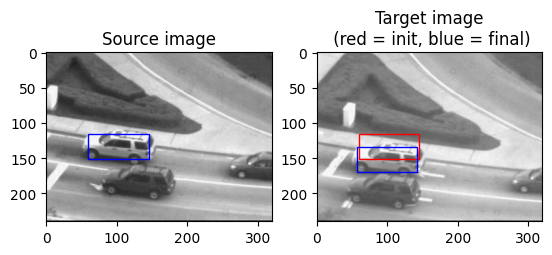

In [4]:
num_iters = 100
threshold = 0.01
seq = np.load("data/carseq.npy")
rect = [59, 116, 145, 151]
It = seq[:,:,0]

# Source frame
plt.figure()
plt.subplot(1,2,1)
plt.imshow(It, cmap='gray')
plt.title('Source image')
draw_rect(rect,'b')

# Target frame + LK
It1  = seq[:,:, 20]
plt.subplot(1,2,2)
plt.imshow(It1, cmap='gray')
plt.title('Target image\n (red = init, blue = final)')
p = LucasKanade(It, It1, rect, threshold, num_iters, p0=np.zeros(2))
rect_t1 = rect + np.concatenate((p,p))
draw_rect(rect,'r')
draw_rect(rect_t1,'b')


## Q2.3: Tracking with template update (15 points)

In [5]:
def TrackSequence(seq, rect, num_iters, threshold, update_template=False):
    """
    :param seq       : (H, W, T), sequence of frames
    :param rect      : (4, 1), coordinates of template in the initial frame. top-left and bottom-right corners.
    :param num_iters : int, number of iterations for running the optimization
    :param threshold : float, threshold for terminating the LK optimization
    :return: rects   : (T, 4) tracked rectangles for each frame
    """
    H, W, N = seq.shape

    rects =[rect]
    It = seq[:,:,0]
    p0 = np.zeros(2)

    # Iterate over the car sequence and track the car
    for i in range(1,N):

        # ===== your code here! =====
        # TODO: add your code track the object of interest in the sequence

        It1 = seq[:,:,i]

        # calculate new p -> this is going to be the new p0 in the next iteration to avoid recalculating (and possibly missing the object)
        p0 = LucasKanade(It, It1, rect, threshold, num_iters, p0=p0)

        # get coordinates for new rectangle
        rect_t = rect + np.concatenate((p0,p0))
        rects.append(rect_t)

        # we also can update the template every frame -> so we are looking for a similar object given the last frame instead of the initial one
        # this way, if the car (or any other object) is rotating and changing its shape a little each frame, we can still track it (otherwise If we keep 
        # comparing it to the initial frame we might end up with a completely different object appearence and lose the tracking) 
        if update_template:
            It = It1
            rect = rect_t
            p0 = np.zeros(2) # we also reset the p0 as we start from the previous frame

        # ===== End of code =====

    rects = np.array(rects)
    assert rects.shape == (N, 4), f"Your output sequence {rects.shape} is not ({N}x{4})"
    return rects

### Q2.3 (a) - Track Car Sequence

Run the following snippets. If you have implemented LucasKanade and TrackSequence function correctly, you should see the box tracking the car accurately. Please note that the tracking might drift slightly towards the end, and that is entirely normal.

Feel free to play with these snippets of code by playing with the parameters.

In [6]:
def visualize_track(seq,rects,frames):
    # Visualize tracks on an image sequence for a select number of frames
    plt.figure(figsize=(15,15))
    for i in range(len(frames)):
        idx = frames[i]
        frame = seq[:, :, idx]
        plt.subplot(1,len(frames),i+1)
        plt.imshow(frame, cmap='gray')
        plt.axis('off')
        draw_rect(rects[idx],'b')


TRACKING WITHOUT TEMPLATE UPDATE:


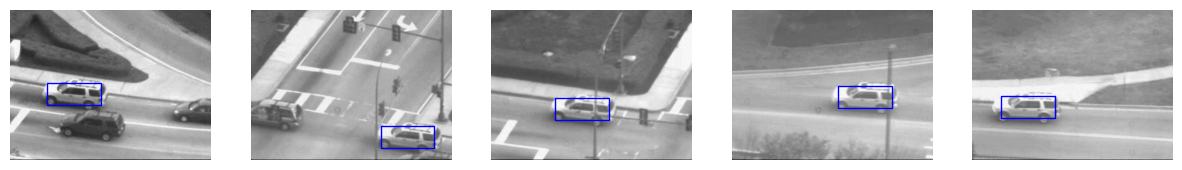


TRACKING WITH TEMPLATE UPDATE:


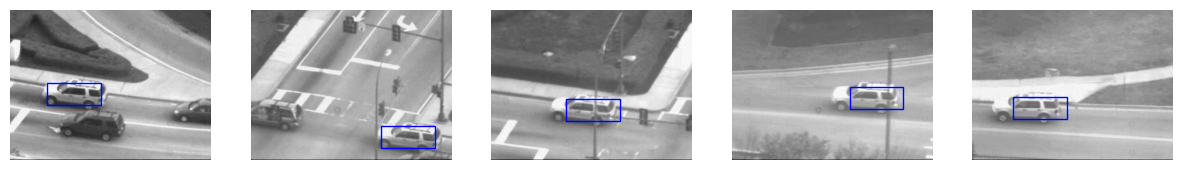

In [7]:
seq = np.load("data/carseq.npy")
rect = [59, 116, 145, 151]

# NOTE: feel free to play with these parameters
num_iters = 10000
threshold = 0.01

print("\nTRACKING WITHOUT TEMPLATE UPDATE:")
rects = TrackSequence(seq, rect, num_iters, threshold)
visualize_track(seq,rects,[0, 79, 159, 279, 409])
plt.show()

print("\nTRACKING WITH TEMPLATE UPDATE:")
rects_with = TrackSequence(seq, rect, num_iters, threshold, update_template=True)
visualize_track(seq,rects_with,[0, 79, 159, 279, 409])
plt.show()

In conclusion, our analysis suggests that updating the template in the next frame did not improve tracking performance in this scenario. It appears that the presence of other vehicles and traffic lights could cause temporary obstructions in the image frame, potentially confusing the tracker if the template were updated. As discussed in class, a more robust approach would involve a life-model-based tracking system that learns in real-time from all previous frames, accounting for potential occlusions and minimizing the risk of losing track of the object due to motion blur or unclear frames.

Curious about the accuracy of this hypothesis, I decided to investigate where the tracking error (measured by the mean squared error between the rectangle corners) increased significantly. Upon plotting the error over time, I observed a notable gap in the error when the car passed behind a traffic light, which caused a temporary loss in tracking. This highlighted that the tracking system struggled during brief occlusions, reinforcing the idea that dynamic, adaptive systems could perform better in such challenging scenarios.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

def create_motion_gif(frames, rects, error, output_path="motion.gif", fps=10):

    images = []
    k = -1
    for rect in rects:
        k += 1
        frame = seq[:, :, k]
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

        # Display frame
        ax1.imshow(frame, cmap="gray")
        ax1.axis('off')
        draw_rect(rect,'b', ax1)

        # Display error
        ax2.plot(error, "r-")
        ax2.axis('off')
        ax2.vlines(x=k, ymin=error.min(), ymax=error.max(), colors='gray', linestyles='--')

        # Convert figure to image
        fig.canvas.draw()
        image = np.array(fig.canvas.renderer.buffer_rgba())

        images.append(image)
        plt.close(fig)  # Close figure to free memory

    # Save as GIF
    imageio.mimsave(output_path, images, fps=fps)
    print(f"GIF saved at {output_path}")

In [29]:
error = ((rects - rects_with)**2).mean(axis=1)
create_motion_gif(seq[:,:,1:], rects, error, "car_tracking_error.gif", fps=20)

GIF saved at car_tracking_error.gif


![Tracking error between models](car_tracking_error.gif)

### Q2.3 (b) - Track Girl Sequence

Same as the car sequence.

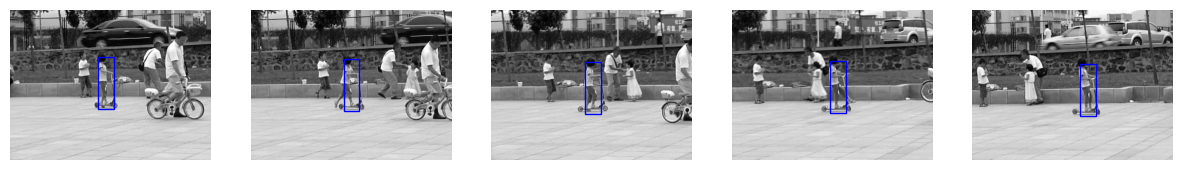

In [10]:
# Loads the squence
seq = np.load("data/girlseq.npy")
rect = [280, 152, 330, 318]

# NOTE: feel free to play with these parameters
num_iters = 10000
threshold = 0.01

rects = TrackSequence(seq, rect, num_iters, threshold)

visualize_track(seq,rects,[0, 14, 34, 64, 84])